# Reseaux de Neurones ou Perceptron Multicouche (PMC)
*Neural Nets/Networks* ou *Deep Learning*

macros latex
$$ 
\def\R{{\mathbb R}} 
\def\x{{\bf x}}
\def\y{{\bf y}}
\def\a{{\bf a}}
\def\w{{\bf w}}
$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

On va regarder plus préciséments les réseaux de neurones (profonds) à propagation avant (*feedforward networks*).

## Rappel : neurone artificiel

### Composition du neurone
Le modèle du neurone artificiel,  est *paramétrique*. Les *hypothèses* sont les fonctions

$$h_\w : \R^d \rightarrow \R$$
  
  où $\w$ est un *vecteur de poids* (paramètres) $\w=(w_1,w_2,\dots,w_d) \in M_{1,d}(\R)$ (vecteur ligne) et biais $b \in \R$ et $f : \R \rightarrow \R$ est une fonction appelée **fonction d'activation**.
  

  $$h(\x) = f\left(\sum_{i=1}^d w_i x_i + b \right) $$
  
  $$ = f\left( \w \cdot \x + b \right) $$

où la variable d'entrée $\x$ (la donnée) est un vecteur colonne $\x =(x_1,x_2,\dots,x_d) \in M_{d,1}(\R)$

Attention : contrairement aux exemples précédents il est de coutume ici de considérer la matrice de conception $X$ où les données sont des vecteurs colonnes (donc la transposée de la matrice $X$ des chapitres précédents).

<img src="images/xx.png" width=500 alt="schéma à venir">

### Fonction d'activation
On peut faire différents choix pour la fonction d'activation $f$:
- dans le cas du *perceptron* on choisit la fonction signe 
$$f(t) = \text{signe}(t) = 1 \text{ si } t \geq 0 \text{ et } f(t) = \text{signe}(t) = -1 \text{ si } t < 0$$
Utilisation : classification, notamment dans le cas linéairement séparable

- pour la *regression logistique* la fonction d'activation est la fonction *sigmoide*
$$f(t) = \sigma(t) = \frac{1}{1+e^{-t}} = \frac{e^t}{e^t + 1}$$
Utilisation : classification et prediction de probabilités

- la *tangente hyperbolique*
$$f(t) = \tanh t = \frac{e^t - e^{-t}}{e^t + e^{-t}} = 2\sigma(2t)-1$$
est semblable à la fonction sigmoïde $\sigma$ mais donne des valeurs dans $]-1;1[$ au lieu de $]0;1[$

- la fonction ReLU pour *Rectified Linear Unit* est très utilisée dans les couches internes des réseaux de neurones 
$$ f(t) = \max(0,t) $$

In [21]:
signe = np.vectorize(lambda t:1 if t >=0 else 0)
reg_log = lambda t: 1/(1+np.exp(-t))
relu = lambda t:np.maximum(0,t)

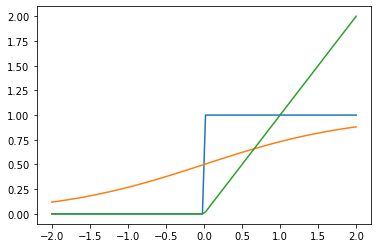

In [23]:
X = np.linspace(-2,2,100)
plt.plot(X,signe(X))
plt.plot(X,reg_log(X))
plt.plot(X,relu(X))
plt.show()

### fonction de coût
Le but du neurone est de produire, à partir d'une entrée $\x$, de produire une valeur de sortie $h_\w(\x)$ qui soit "proche" d'une valeur $y$ donnée, pour un ensemble de données $(\x^i,y^i)$.

Une fonction de coût (ou perte) permet de mesurer l'écart entre $h_\w(\x)$ et $y$ ; on cherchera en grénéral à minimiser cette fonction de coût (à laquelle peuvent s'ajouter des considérations de régularisation pour éviter la suradaptation ; voir plus tard).

Des fonctions de coût classiques sont (en notant $\hat{y} = h_\w(\x)$)
- coût quadratique  
$$C(\hat{y},y) = (\hat{y} - y)^2$$
- coût absolu   
$$C(\hat{y},y) = |\hat{y} - y|$$
- entropie croisée (*cross entropy*) pour les probabilités $y,\hat{y} \in [0,1]$ (utilisé pour la reg. logistique)  

$$C(\hat{y},y) = -\hat{y}\log{y} -(1-\hat{y})\log{(1-y)} $$
    

### Descente de gradient stochastique

Etant donné une donnée $(\x^i,y^i)$ on cherche à minimiser le coût:
$$ (b,\w) \longmapsto C( h_\w(\x^i), y^i )$$
soit
    $$(b,\w)  \longmapsto C(f\left( \w \cdot \x^i + b \right), y^i )$$

On peut détailler la composition de cette fonction :
    $$(b,\w) \stackrel{\text{produit par} (\x^i, 1)}{\longmapsto} z = \x^i \cdot \w + b \stackrel{f}{\longmapsto} \hat{y} = f\left( \w \cdot \x^i  + b \right) \stackrel{C(\cdot,y^i)}{\longmapsto} C(f\left( \w \cdot \x^i + b \right), y^i )$$
et utiliser la règle des dérivées composées pour écrire que
$$\frac{\partial C(\hat{y},y^i)}{\partial w_j} = \frac{\partial C(\hat{y},y^i)}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial z} \times \frac{\partial z}{\partial w_j} $$
soit
$$\frac{\partial C(\hat{y},y^i)}{\partial w_i} (b,\w) = \frac{\partial C(\hat{y},y^i)}{\partial \hat{y}} (\hat{y},y^i) \times \frac{\partial f(z)}{\partial z} (z) \times \frac{\partial ("\w \cdot \x^i + b") }{\partial w_j} (b,\w) $$

Le premier facteur $\frac{\partial C(\hat{y},y^i)}{\partial w_j}$ dépend du coût ; par exemple pour le coût quadratique
$C(\hat{y},y^i) = (\hat{y} - y^i)^2$ on a 
$$ \frac{\partial C(\hat{y},y^i)}{\partial w_i} = 2 (\hat{y} - y^i)$$
Le deuxième facteur $\frac{\partial f(z)}{\partial z} (z) $ est simplement la dérivée $f'(z)$  
Le troisième facteur $\frac{\partial ("\w \cdot \x^i + w_0") }{\partial w_j}$
est $(x^i)_j$ si $j>1$ et $1$ si $j=0$.

Dans l'exemple du coût quadratique, on obtient donc pour la dérivée partielle $\frac{\partial C(\hat{y},y^i)}{\partial w_j}$ au point $(b,\w)$ (pour $w_j$, sinon remplacer $(x^i)_j par 1$) 
$$ \frac{\partial C(\hat{y},y^i)}{\partial w_i} = 2 (\hat{y} - y^i) \times f'(z) \times (x^i)_j $$
$$ = 2 (f\left( \w \cdot \x^i + b \right) - y^i) \times f'\left( \w \cdot \x^i + b \right) \times (x^i)_j $$


On peut donc écrire le gradient de $C(\hat{y},y^i)$ par rapport à $(w_0,\w)$ comme étant 
$$ \nabla_{(w_0,\w)} \left( C(\hat{y},y^i) \right) = \left( 2(f( \w \cdot \x^i + w_0) - y^i) \cdot f'\left( \w \cdot \x^i  + w_0 \right) \right) \cdot (1,\x^i)$$

Pour rappel, afin de minimiser ce coût $C(\hat{y},y^i)$, il faut effectuer une descente de gradient en répétant l'opération
\begin{equation} \label{eq1}
(b,\w) \leftarrow (b,\w) - \alpha  \nabla_{(b,\w)} \left( C(\hat{y}(\x^i),y^i) \right) 
\end{equation}
(les valeurs $\x^i,y^i$ étant fixées) où $\alpha$, le pas ou taux d'apprentissage est bien choisi (on peut aussi prendre $\alpha$ qui tend vers 0 au fur et à mesure, typiquement $\alpha = \frac{1}{t}$).

Si on veut entraîner le neurone sur des données multiples $(x^i,y^i)$ alors on cherchera en général à minimiser l'erreur moyenne
$$ C_m = \frac{1}{m} \sum_{i=1}^m C\left(\hat{y}(\x^i),y^i\right)$$,
ce qui peut être fait en prenant directement le gradient total
$$ \nabla_{(w_0,\w)} C_m = \frac{1}{m} \sum_{i=1}^m  \nabla_{(w_0,\w)} C\left(\hat{y}(\x^i),y^i\right)$$

(descente de gradient "classique" ou "batch"), ou bien en prenant successivement les gradients $$\nabla_{(w_0,\w)} C\left(\hat{y}(\x^i),y^i\right)$$ de chaque donnée et en itérant circulairement sur $i$, c'est la descente de gradient dite stochastique. On peut également combiner les données en lots (mini-batch).

## Réseaux multicouches

Un neurone simple est très limité : il ne peut pas par exemple apprendre la fonction XOR de $\R^2$ dans $R$ qui vaut 1 sur $(0,0)$ et $(1,1)$ et vaut $0$ sur $(0,1)$ et $(1,0)$. En combinant assez de neurones on obtient une classe de neurones beaucoup plus riches (mais avec plus de paramètres).

### un premier exemple

On a une donnée à deux entrées $(x_1, x_2)^T$ et on veut prédire une valeur réelle $y$ (problème de régression). On considère trois neurones:
- deux sur une couché d'entrée, la couche 1, qui vont chacun respectivement transformer l'entrée $(x_1, x_2)$ en
$$a_1 = f(b^{(1)}_1 + w^{(1)}_{1,1} x_1 + w^{(1)}_{1,2} x_2)$$
et
$$a_2 = f(b^{(1)}_2 + w^{(1)}_{2,1} x_1 + w^{(1)}_{2,2} x_2)$$
- un neurone de sortie qui va transformer son entrée $(a_1,a_2)$ en
$$\hat{y} = b^{(2)} + w^{(2)}_1 a_1 + w^{(2)}_2 a_2$$

On prendra ici pour $f$ la fonction d'activation ReLU $f(t)=\max(0,t)$. Si on ne prenait pas de fonction d'activation non-linéaire alors en remplaçant $a_1$ et $a_2$ par leurs valeurs en fonction de $x_1,x_2$ dans l'expression de $\hat{y}$ on voit que la fonction obtenue serait toujours linéaire, et serait équivalente à un unique neurone.  
Pour le coût final appliqué, on peut prendre le coût quadratique $C(\hat{y},y) = (\hat{y} - y)^2$.

La prédiction du modèle sur une entrée $(x_1,x_2)$ est donc
$$\hat{y} = \hat{y} = b^{(2)} + w^{(2)}_1 \max(0,b^{(1)}_1 + w^{(1)}_{1,1} x_1 + w^{(1)}_{1,2} x_2) + w^{(2)}_2 \max(0,b^{(1)}_2 + w^{(1)}_{2,1} x_1 + w^{(1)}_{2,2} x_2) $$

On a donc une fonction qui associe une valeur réelle à chaque entrée $(x_1, x_2)$, qui dépend de 9 paramètres à déterminer.

In [42]:
def fonction_exemple(b1_1,b1_2,w1_11,w1_12,w1_21,w1_22,b2,w2_1,w2_2):
    """renvoie la fonction ci-dessus dont on precise les paramètres"""
    f = lambda x1,x2 : b2 + w2_1*max(0,b1_1 + w1_11*x1 + w1_12*x2) + w2_2*max(0,b1_2 + w1_21*x1 + w1_22 * x2)
    return np.vectorize(f)

In [43]:
f = fonction_exemple(*np.random.normal(0,1,9))

In [44]:
f(3,2)

array(-2.34442886)

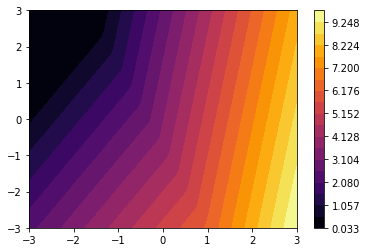

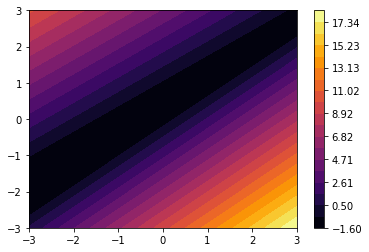

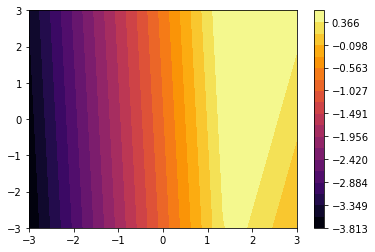

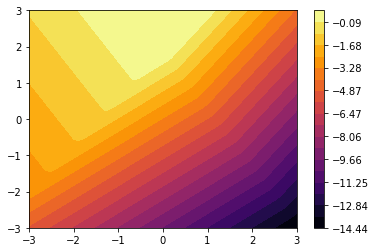

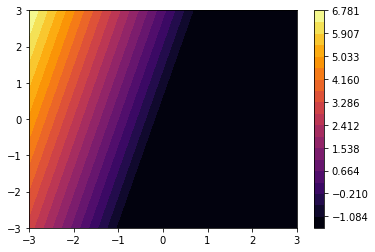

In [50]:
for i in range(5):
    f = fonction_exemple(*np.random.uniform(-2,2,9))
    X = np.linspace(-3,3,50)
    X1, X2 = np.meshgrid(X,X)
    F = f(X1,X2)
    levels = np.linspace(np.min(F),np.max(F),20)
    cp = plt.contourf(X1,X2, F,levels, cmap='inferno')
    plt.colorbar(cp)  # pratique pour voir les valeurs
    plt.show()

Pour entraîner cette fonction sur des données il faudra calculer le gradient par rapport aux valeurs $\w$ du coût $C(\hat{y}(x),y)$ où $(x,y)$ est une donnée fixée. Ici on d'après l'expression précédente
$$\hat{y} = \hat{y} = b^{(2)} + w^{(2)}_1 \max(0,b^{(1)}_1 + w^{(1)}_{1,1} x_1) + w^{(1)}_{1,2} x_2) + w^{(2)}_2 \max(0,b^{(1)}_2 + w^{(1)}_{2,1} x_1 + w^{(1)}_{2,2} x_2) $$
les dérivées
$$\frac{\partial \hat{y}}{\partial b^{(2)}} = 1$$
$$\frac{\partial \hat{y}}{\partial w^{(2)}_1} = a_1 = \max(0,b^{(1)}_1 + w^{(1)}_{1,1} x_1 + w^{(1)}_{1,2} x_2)$$
($a_1$ ne dépend pas de $w^3_1$) et de même  
$$\frac{\partial \hat{y}}{\partial w^{(3)}_2} = a^2 = \max(0,b^{(1)}_2 + w^{(1)}_{2,1} x_1 + w^{(1)}_{2,2} x_2) $$


La dérivée de $t \mapsto max(0,t)$ est 0 pour $t<0$ et égale à $1$ pour $t >0$ ; on part du principe qu'on ne tombera pas sur la valeur problématique $t=0$ où cette fonction est non dérivable ! On peut noter sa dérivée
$$ \mathbb{1}_{t > 0} $$ d'où
$$\frac{\partial \hat{y}}{\partial w^{(1)}_{1,1}} = w^{(2)}_1 \times x_1 \times  \mathbb{1}_{b^{(1)}_1 + w^{(1)}_{1,1} x_1 >0}$$
et
$$\frac{\partial \hat{y}}{\partial b^{(1)}_1} =w^{(2)}_1 \times x_1  \times \mathbb{1}_{b^{(1)}_1 + w^{(1)}_{1,1} x_1 >0}$$
et procède de même pour les autres dérivées.
Il faut alors remplacer dans 
$$\frac{\partial C(\hat{y},y^i)}{\partial w^j_k} = 2(\hat{y}-y) \times \frac{\partial \hat{y}}{\partial w^j_k}$$


## Réseau général à couches multiples
On note $x = a^0$ la donnée d'entrée du réseau de dimension $d^0$ (vecteur colonne) et les valeurs successives sur les $L$ couches ayant  respectivement $d^{(1)}, d^{(2)}, \dots, d^{(L)}$ neurones,  sont déterminées récursivement pour $\ell=1,2,\dots,L$ par
- $$ z^{(\ell)} = W^{(\ell)} a^{(\ell-1)} + b^{\ell}$$ où $W^{(\ell)} \in M_{d^{(\ell)},d^{(\ell-1)}} (\R)$ est une matrice
- $$ a^{(\ell)} = f^{(\ell)} (z^{(\ell)}) $$ où $f^{\ell}$ est une fonction de $\R$ dans $\R$ qui est appliquée coordonnée par coordonnée sur le vecteur $z^{(\ell)}$.

schéma

Remarques :
  - la valeur d'entrée du réseau est $x = a^0$, la valeur de sortie est $\hat{y} = a^L$ (souvent de dimension 1 mais pas toujours)
  - les vecteurs $a^{\ell}$ sont les *activités* successives des couches de neurones, il sont obtenus en appliquant une *fonction d'activité* $f^{\ell}$ aux *pré-activités* $z^L$ 
  - les pré-activités $z^\ell$ sont des combinaisons affines des activités $a^{\ell-1}$, combinaisons dont les coefficients multiplicateurs sont les dans la matrice $W^{\ell}$ et les termes additifs, le vecteur de biais $b^{\ell}$.
  - la couche $\ell=1$ est dite *couche d'entrée*, la couche $\ell=L$ la *couche des sortie*, les autres couches de neurones sont les *couches cachées*. On parle d'apprentissage profond dès qu'il y une ou plusieurs couches cachées.

### Classe pour l'implémentation

## Algorithme de rétropropagation

### Rappel sur la règles des dérivées chaînées, graphe de calcul

cas simple

cas avec branchements

(formulation avec les différentielles ?)

### Cas où tout est en dimension 1.